Importing libraries <br>
Fetching the dataset<br>
Creating the dependent variable class<br>
Extracting features and output<br>
Train-Test dataset splitting (may also include validation dataset)<br>
Feature scaling<br>
Training the model<br>
Calculating the model score using the metric deemed fit based on the problem<br>
Saving the model for future use<br>

In [ ]:
# To detect double disease case explicitly 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
shuffle = True
test_size = 0.

estimators = 100

C:\Users\Tadi Sai Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
notHel_notDM = pd.read_csv('../updated-data/Hel-DM-_res_v1.txt','\t')
Hel_notDM = pd.read_csv('../updated-data/Hel+DM-_res_v1.txt', '\t')

notHel_notDM['Hel+DM-'] = 0 
Hel_notDM['Hel+DM-'] = 1

combined_df = Hel_notDM.append(notHel_notDM)
display(combined_df.head())

X_train, X_test , y_train, y_test = train_test_split(combined_df[combined_df.columns.difference(['Hel+DM-'])],
                                                    combined_df[['Hel+DM-']], test_size=test_size, shuffle=shuffle) 

# we classify helminth in non diabetics
# classifier built between patients with helminth and DM and helminth and non DM to get the important features of helminth 
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
clf_Hel_notDM = RandomForestClassifier(n_estimators=estimators, criterion='gini', max_depth=None)
clf_Hel_notDM.fit(X_train,y_train)

,Adiponectin (pg/ml),Adipsin (pg/ml),Basophils (%),Eosinophils (%),G-CSF (pg/ml),Glucagon (pg/ml),GM-CSF (pg/ml),HbA1c (%),HCT (%),Hgb (g/dl),...,Urea (mg/dl),Visfatin (pg/ml),WBC (103/ml),Age,BMI,ALT (U/L),AST (U/L),Creatinine (mg/dl),Sex,Hel+DM-
0,14661.746056,692.697431,-0.374302,0.183938,-110.901749,-111.449173,-106.732585,0.126922,-3.213298,-4.121204,...,-2.368953,-2263.740827,0.459756,48,21.5,34,25,0.8,0,1
1,-12417.171869,1594.142309,-0.327563,1.455210,173.555331,-48.027259,527.943748,-0.057333,5.249485,6.120462,...,-1.832602,2436.364502,-0.614132,37,19.0,11,20,0.7,0,1
2,-1253.114936,222.580501,-0.343774,2.614586,158.840679,-56.571461,500.339924,0.160077,-10.727102,-1.800603,...,5.369090,-1261.355994,1.367373,35,24.1,16,25,0.8,0,1
3,6079.040397,23.905180,0.469430,-7.697694,-248.885366,-45.414679,249.976707,0.143460,6.423743,-4.177082,...,10.809333,-541.394341,1.562163,28,20.0,17,27,0.8,0,1
4,-4743.095660,44.728119,-0.578556,-5.594756,92.574963,-9.809351,305.016868,0.322815,1.784404,-1.227489,...,0.187380,552.868238,1.166809,28,21.9,24,18,0.8,1,1


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [3]:
notHel_notDM = pd.read_csv('../updated-data/Hel-DM-_res_v1.txt','\t')
notHel_DM = pd.read_csv('../updated-data/Hel-DM+_res_v1.txt', '\t')

notHel_notDM['Hel-DM+'] = 0
notHel_DM['Hel-DM+'] = 1

combined_df = notHel_DM.append(notHel_notDM)

X_train, X_test , y_train, y_test = train_test_split(combined_df[combined_df.columns.difference(['Hel-DM+'])],
                                                    combined_df[['Hel-DM+']], test_size=test_size, shuffle=shuffle) 

#classify the patients with diabetics and no helminth
# classifier built between patients with no-helminth and DM and no-helminth and non DM to get the important features of helminth 
# this may help in features in classifying no-helminth
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
clf_notHel_DM = RandomForestClassifier(n_estimators = estimators, criterion='gini', max_depth=None)
clf_notHel_DM.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
notHel_notDM = pd.read_csv('../updated-data/Hel-DM-_res_v1.txt','\t')
Hel_DM = pd.read_csv('../updated-data/Hel+DM+_res_v1.txt', '\t')

notHel_notDM['Hel+DM+'] = 0
Hel_DM['Hel+DM+'] = 1

combined_df = Hel_DM.append(notHel_notDM)

X_train, X_test , y_train, y_test = train_test_split(combined_df[combined_df.columns.difference(['Hel+DM+'])],
                                                    combined_df[['Hel+DM+']], test_size=test_size, shuffle=shuffle) 

#
# classifier built between patients with no-helminth and DM and no-helminth and non DM to get the important features of helminth 
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
clf_Hel_DM = RandomForestClassifier(n_estimators=estimators, criterion='gini', max_depth=None)
clf_Hel_DM.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
result = pd.DataFrame(clf_Hel_DM.feature_importances_, index=combined_df.columns[0:50], columns=['Hel+DM+'])
result['Hel-DM+'] = clf_notHel_DM.feature_importances_
result['Hel+DM-'] = clf_Hel_notDM.feature_importances_


result = result[result['Hel+DM+'] > result['Hel-DM+']]
result = result[result['Hel+DM+'] > result['Hel+DM-']]
result = result.sort_values(['Hel+DM+'] , ascending=False)


# result

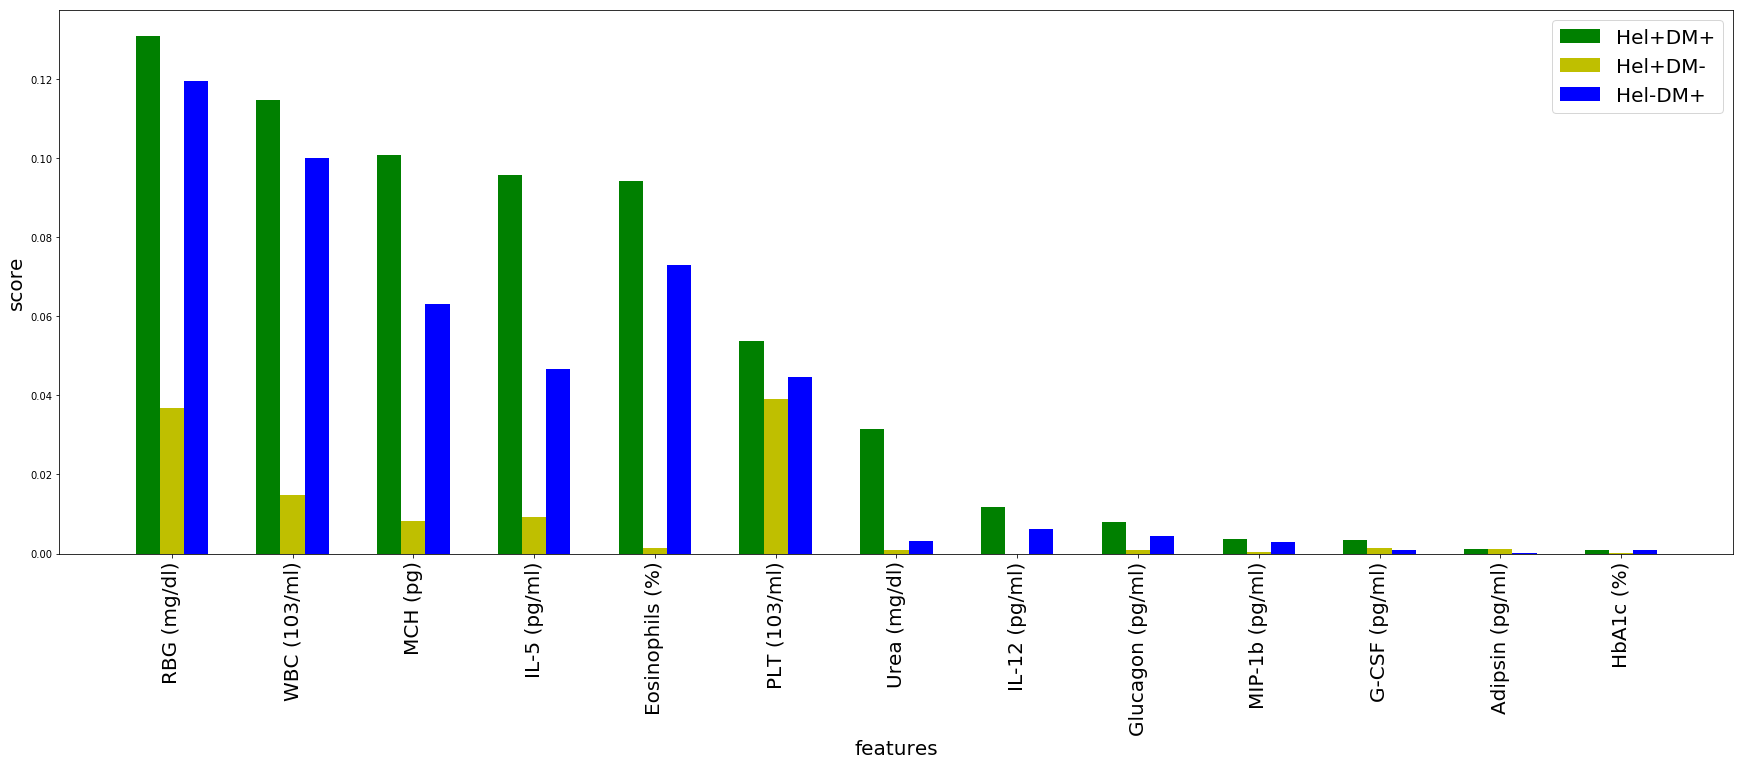

In [6]:
score_Hel_DM = np.array(result['Hel+DM+'])
score_Hel_notDM = np.array(result['Hel+DM-'])
score_notHel_DM = np.array(result['Hel-DM+'])

gap = 5 
X = np.array(np.array(range(2, result.shape[0]*gap + 1, gap)))
X

width = 1

plt.figure(figsize=(30,10))
plt.bar(X - 2*width, score_Hel_DM, width= width, align='center', color='g', label='Hel+DM+')
plt.bar(X - width, score_Hel_notDM, width= width, align='center', color='y', label = 'Hel+DM-')
plt.bar(X, score_notHel_DM, width= width, align='center', color='b',label = 'Hel-DM+')


plt.legend(fontsize = 20)
plt.xticks(X - width,result.index, rotation=90)
plt.xlabel('features',fontsize=20)
plt.ylabel('score',fontsize=20)

plt.show()


In [7]:
notHel_notDM = pd.read_csv('../updated-data/Hel-DM-_res_v1.txt','\t') #0
Hel_notDM = pd.read_csv('../updated-data/Hel+DM-_res_v1.txt', '\t')   #0
notHel_DM = pd.read_csv('../updated-data/Hel-DM+_res_v1.txt', '\t')  #0
Hel_DM = pd.read_csv('../updated-data/Hel+DM+_res_v1.txt', '\t')     #1


notHel_notDM['Hel+DM+'] = False
Hel_notDM['Hel+DM+'] = False
notHel_DM['Hel+DM+'] = False
Hel_DM['Hel+DM+'] = True



combined_df = notHel_notDM.append(Hel_notDM)
combined_df = combined_df.append(notHel_DM)
combined_df = combined_df.append(Hel_DM)
# print(combined_df.columns)

reduced_combined_df = combined_df[['Urea (mg/dl)','IL-5 (pg/ml)','MCH (pg)','MCV (fL)', 'Eosinophils (%)', 'Hel+DM+']]
reduced_combined_df.head()

X_train, X_test, y_train, y_test = train_test_split(reduced_combined_df[reduced_combined_df.columns.difference(['Hel+DM+'])],
                                                    reduced_combined_df['Hel+DM+'],test_size= 0.25,random_state=21)

#display(X_train)
classifier = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,n_jobs=-1)
classifier.fit(X_train, y_train)
a=classifier.feature_importances_
print(classifier.score(X_test,y_test))






0.8


In [8]:
# test accuracy of classification of double disease with other cases using all 50 features.
# I want to comapre its accuracy with our finded 4 features classifier accuracy

notHel_notDM = pd.read_csv('../updated-data/Hel-DM-_res_v1.txt','\t') #0
Hel_notDM = pd.read_csv('../updated-data/Hel+DM-_res_v1.txt', '\t')   #0
notHel_DM = pd.read_csv('../updated-data/Hel-DM+_res_v1.txt', '\t')  #0
Hel_DM = pd.read_csv('../updated-data/Hel+DM+_res_v1.txt', '\t')     #1


notHel_notDM['Hel+DM+'] = False
Hel_notDM['Hel+DM+'] = False
notHel_DM['Hel+DM+'] = False
Hel_DM['Hel+DM+'] = True



combined_df = notHel_notDM.append(Hel_notDM)
combined_df = combined_df.append(notHel_DM)
combined_df = combined_df.append(Hel_DM)
# print(combined_df.columns)

X_train, X_test, y_train, y_test = train_test_split(combined_df[reduced_combined_df.columns.difference(['Hel+DM+'])],
                                                    combined_df['Hel+DM+'],test_size= 0.25,random_state=21)

#display(X_train)
classifier = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,n_jobs=-1)
classifier.fit(X_train, y_train)
a=classifier.feature_importances_
print(classifier.score(X_test,y_test))






0.7666666666666667


In [43]:
# instead of accuracy, we did recall and precision test
# recall = true positive / (true positive + false negative)
# precisiion = true positive / (true positive + false positive)

notHel_notDM = pd.read_csv('../updated-data/Hel-DM-_res_v1.txt','\t') #0
Hel_notDM = pd.read_csv('../updated-data/Hel+DM-_res_v1.txt', '\t')   #0
notHel_DM = pd.read_csv('../updated-data/Hel-DM+_res_v1.txt', '\t')  #0
Hel_DM = pd.read_csv('../updated-data/Hel+DM+_res_v1.txt', '\t')     #1


notHel_notDM['Hel+DM+'] = False
Hel_notDM['Hel+DM+'] = False
notHel_DM['Hel+DM+'] = False
Hel_DM['Hel+DM+'] = True



combined_df = notHel_notDM.append(Hel_notDM)
combined_df = combined_df.append(notHel_DM)
combined_df = combined_df.append(Hel_DM)
# print(combined_df.columns)

reduced_combined_df = combined_df[['Urea (mg/dl)','IL-5 (pg/ml)','MCH (pg)','MCV (fL)', 'Eosinophils (%)', 'Hel+DM+']]
# reduced_combined_df.head()

X_train, X_test, y_train, y_test = train_test_split(reduced_combined_df[reduced_combined_df.columns.difference(['Hel+DM+'])],
                                                    reduced_combined_df['Hel+DM+'],test_size= 0.25,random_state=21)

classifier = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,n_jobs=-1)
classifier.fit(X_train, y_train)

y_predicted = classifier.predict(X_test)

true_positive = 0
false_negative = 0
false_positive = 0

for i in range(y_predicted.shape[0]):
    if y_test.iloc[i] == True and y_predicted[i] == True:
        true_positive += 1
    elif y_test.iloc[i]== True and y_predicted[i] == False:
        false_negative += 1
    elif y_test.iloc[i] == False and y_predicted[i] == True:
        false_positive += 1

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)



print('recall', recall)
print('precision', precision)



recall 0.35294117647058826
precision 0.75
